# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어오기
- 시각화에 한글이 포함된 경우 이에 대한 설정 진행

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
- 단축 경로1: 'https://bit.ly/CustomersFile'    
- 단축 경로2: 'https://bit.ly/ProductsFile'  
- 단축 경로3: 'https://bit.ly/OrdersFile'  

In [3]:
# customers 데이터 읽어오기
path = 'https://bit.ly/CustomersFile'
customers = pd.read_csv(path)

# 확인
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [4]:
# products 데이터 읽어오기
path = 'https://bit.ly/ProductsFile'
products = pd.read_csv(path)

# 확인
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [5]:
# orders 데이터 읽어오기
path = 'https://bit.ly/OrdersFile'
orders = pd.read_csv(path)

# 확인
orders.head(5)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


## 2.데이터 탐색

**1) 고객 정보(customers)**

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [6]:
# 상위 데이터
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [7]:
# 하위 데이터
customers.tail()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
2238,c400937,2017-03-12,인천광역시 계양구 주부토로,F,1980,인천광역시,계양구
2239,c401555,2017-03-20,경기도 남양주시 별내면 청학로68번길,F,1981,경기도,남양주시
2240,c401584,2017-03-20,경기도 성남시 분당구 불정로,F,1979,경기도,성남시
2241,c402010,2017-03-25,경기도 성남시 분당구 판교원로82번길,F,1969,경기도,성남시
2242,c402634,2017-03-30,경기도 용인시 수지구 죽전로,F,1960,경기도,용인시


In [8]:
# 열 정보 확인
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Address       2243 non-null   object
 3   Gender        2243 non-null   object
 4   BirthYear     2243 non-null   int64 
 5   Addr1         2243 non-null   object
 6   Addr2         2243 non-null   object
dtypes: int64(1), object(6)
memory usage: 122.8+ KB


In [9]:
# 기초통계정보
customers.describe()

,BirthYear
count,2243.000000
mean,1971.107445
std,9.658465
min,1932.000000
25%,1966.000000
50%,1972.000000
75%,1978.000000
max,1999.000000


In [10]:
# 결측치 확인
customers.isna().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

In [11]:
# 전체 고객 수
customers['CustomerID'].count()

2243

In [12]:
# 지역1(Addr1)별 고객 수
tmp = customers.groupby(by='Addr1', as_index=False)['CustomerID'].count()
tmp.columns = ['Addr1', 'CustCount']

# 확인
tmp

,Addr1,CustCount
0,강원도,62
1,경기도,1260
2,경상남도,1
3,경상북도,2
4,광주광역시,3
5,대구광역시,8
6,서울특별시,564
7,인천광역시,325
8,전라남도,3
9,전라북도,1


In [13]:
# 지역1(Addr1)별 고객 수 (내림차순)
tmp = tmp.sort_values(by='CustCount', ascending=False)
tmp.reset_index(drop=True, inplace=True)

# 확인
tmp

,Addr1,CustCount
0,경기도,1260
1,서울특별시,564
2,인천광역시,325
3,강원도,62
4,대구광역시,8
5,충청북도,8
6,충청남도,6
7,광주광역시,3
8,전라남도,3
9,경상북도,2


In [14]:
# 각 지역 고객수가 전체에서 차지하는 비율
tmp['CustRate(%)'] = tmp['CustCount'] / tmp['CustCount'].sum() * 100

# 확인
tmp

,Addr1,CustCount,CustRate(%)
0,경기도,1260,56.174766
1,서울특별시,564,25.144895
2,인천광역시,325,14.489523
3,강원도,62,2.764155
4,대구광역시,8,0.356665
5,충청북도,8,0.356665
6,충청남도,6,0.267499
7,광주광역시,3,0.133749
8,전라남도,3,0.133749
9,경상북도,2,0.089166


**2) 상품 정보(products)**

In [15]:
# 상위 데이터
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [16]:
# 하위 데이터
products.tail()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
57,p1246581,초코우유,유제품,우유,4
58,p1255281,딸기요거트,유제품,요거트,4
59,p1256521,부침용두부,반찬류,두부,1
60,p1284851,유기농우유,유제품,우유,4
61,p1299491,당근,채소,뿌리채소,5


In [17]:
# 열 정보 확인
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    62 non-null     object
 1   ProductName  62 non-null     object
 2   Category     62 non-null     object
 3   SubCategory  62 non-null     object
 4   CategoryOrd  62 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


In [18]:
# 기초통계정보
products.describe()

,CategoryOrd
count,62.000000
mean,3.612903
std,1.406715
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [19]:
# 결측치 확인
products.isna().sum()

ProductID      0
ProductName    0
Category       0
SubCategory    0
CategoryOrd    0
dtype: int64

In [20]:
# 전체 상품 수
products['ProductID'].count()

62

In [21]:
# 대분류별 상품 수
products.groupby(by='Category', as_index=False)['ProductID'].count()

,Category,ProductID
0,간식,11
1,과일,6
2,반찬류,8
3,유제품,14
4,채소,23


In [22]:
# 대분류 + 소분류별  상품 수
products.groupby(by=['Category', 'SubCategory'], as_index=False)['ProductID'].count()

,Category,SubCategory,ProductID
0,간식,과자,6
1,간식,빵,2
2,간식,사탕류,3
3,과일,과수,2
4,과일,과채,4
5,반찬류,나물류,2
6,반찬류,두부,6
7,유제품,아이스크림,7
8,유제품,요거트,2
9,유제품,우유,5


**3) 주문 정보(orders)**

In [23]:
# 상위 데이터
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


In [24]:
# 하위 데이터
orders.tail()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
68834,76,1,2017-03-31,p1201601,1,2100,c302834
68835,77,1,2017-03-31,p1002841,1,10700,c343734
68836,78,1,2017-03-31,p1012761,1,1900,c354639
68837,79,1,2017-03-31,p1005891,1,1950,c394131
68838,79,2,2017-03-31,p1179241,1,2200,c394131


In [25]:
# 열 정보 확인
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     68839 non-null  int64 
 1   Seq         68839 non-null  int64 
 2   OrderDate   68839 non-null  object
 3   ProductID   68839 non-null  object
 4   Qty         68839 non-null  int64 
 5   Amt         68839 non-null  int64 
 6   CustomerID  68839 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [26]:
# 기초통계정보
orders.describe()

,OrderID,Seq,Qty,Amt
count,68839.000000,68839.000000,68839.000000,68839.000000
mean,38.551519,2.082628,1.266985,2847.057990
std,23.952370,1.469644,1.372289,2634.378327
min,1.000000,1.000000,1.000000,250.000000
25%,18.000000,1.000000,1.000000,1300.000000
50%,37.000000,2.000000,1.000000,1950.000000
75%,56.000000,3.000000,1.000000,3227.000000
max,122.000000,15.000000,200.000000,109100.000000


In [27]:
# 결측치 확인
orders.isna().sum()

OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64

In [28]:
# 전체 판매 건수
orders['OrderID'].count()

68839

In [29]:
# 수량, 판매 금액 최댓값
orders[['Qty', 'Amt']].max()

Qty       200
Amt    109100
dtype: int64

In [30]:
# 수량, 판매 금액 최솟값
orders[['Qty', 'Amt']].min()

Qty      1
Amt    250
dtype: int64

## 3.데이터 전처리

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.

- 병합할 orders 데이터

In [31]:
# 병합할 주문 정보:OrderDate, ProductID, Qty, Amt, CustomerID
orders = orders[['OrderDate', 'ProductID', 'Qty', 'Amt', 'CustomerID']]
orders.head()

,OrderDate,ProductID,Qty,Amt,CustomerID
0,2016-01-02,p1030071,2,7900,c107853
1,2016-01-02,p1012761,1,1700,c110521
2,2016-01-02,p1012581,1,1000,c110521
3,2016-01-02,p1175481,1,1300,c110521
4,2016-01-02,p1178011,1,8800,c110521


- 병합할 customers 데이터

In [32]:
# 병합할 고객 정보:CustomerID, RegisterDate, Gender, BirthYear, Addr1
customers = customers[['CustomerID', 'RegisterDate', 'Gender', 'BirthYear', 'Addr1']]
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1
0,c017487,2002-07-31,F,1968,경기도
1,c017503,2002-07-31,F,1971,서울특별시
2,c017517,2002-07-31,M,1967,경기도
3,c017522,2002-07-31,F,1965,강원도
4,c017526,2002-07-31,F,1960,경기도


- 병합할 products 데이터

In [33]:
# 병합할 상품 정보:ProductID, ProductName, Category, SubCategory
products = products[['ProductID', 'ProductName', 'Category', 'SubCategory']]
products.head()

,ProductID,ProductName,Category,SubCategory
0,p1001771,마늘,채소,뿌리채소
1,p1002841,딸기_대,과일,과채
2,p1005621,숙주나물,반찬류,나물류
3,p1005771,두부_소,반찬류,두부
4,p1005891,두부_대,반찬류,두부


- 데이터 병합

In [34]:
# 데이터 병합
sales = pd.merge(orders, customers, on='CustomerID', how='inner')
sales = pd.merge(sales, products, on='ProductID', how='inner')

**2) 결과 확인**

In [35]:
# 상위 데이터 확인
sales.head()

,OrderDate,ProductID,Qty,Amt,CustomerID,RegisterDate,Gender,BirthYear,Addr1,ProductName,Category,SubCategory
0,2016-01-02,p1030071,2,7900,c107853,2008-07-11,M,1961,경기도,토마토,과일,과채
1,2016-05-05,p1030071,2,8200,c110521,2008-09-04,F,1972,경기도,토마토,과일,과채
2,2017-03-12,p1030071,2,9600,c110521,2008-09-04,F,1972,경기도,토마토,과일,과채
3,2016-11-05,p1030071,1,4700,c256672,2012-09-13,F,1980,서울특별시,토마토,과일,과채
4,2016-02-13,p1030071,1,4650,c260294,2012-10-22,F,1980,서울특별시,토마토,과일,과채


In [36]:
#  하위 데이터 확인
sales.tail()

,OrderDate,ProductID,Qty,Amt,CustomerID,RegisterDate,Gender,BirthYear,Addr1,ProductName,Category,SubCategory
68834,2017-01-14,p1139681,1,909,c127610,2009-05-05,F,1979,경기도,감귤컵푸딩,간식,사탕류
68835,2016-12-29,p1139681,1,909,c389635,2016-09-30,F,1991,경기도,감귤컵푸딩,간식,사탕류
68836,2017-03-06,p1139681,1,909,c396022,2016-12-23,F,1983,경기도,감귤컵푸딩,간식,사탕류
68837,2017-02-12,p1139681,5,4545,c334072,2014-11-21,F,1968,서울특별시,감귤컵푸딩,간식,사탕류
68838,2017-03-28,p1139681,1,909,c401584,2017-03-20,F,1979,경기도,감귤컵푸딩,간식,사탕류


**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 나이, 연령별 분석을 하기 위함(2017 - 출생년도)
    - RegisterYear: 등록연도, 등록연도별 분석이 용이하게 하기 위함
    - RegisterMonth: 등록월, 등록년월 분석이 용이하게 하기 위함
    - AgeGrp: 연령대, 연령대별로 분석이 용이하게 하기 위함

In [37]:
# 데이터 형식 변경
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
sales['RegisterDate'] = pd.to_datetime(sales['RegisterDate'])

# 열 추가
sales['OrderYear'] = sales['OrderDate'].dt.year
sales['OrderMonth'] = sales['OrderDate'].dt.month
sales['RegisterYear'] = sales['RegisterDate'].dt.year
sales['RegisterMonth'] = sales['RegisterDate'].dt.month
sales['Age'] = 2017 - sales['BirthYear']
sales['AgeGrp'] = sales['Age'] // 10 * 10

# 확인
sales.head()

,OrderDate,ProductID,Qty,Amt,CustomerID,RegisterDate,Gender,BirthYear,Addr1,ProductName,Category,SubCategory,OrderYear,OrderMonth,RegisterYear,RegisterMonth,Age,AgeGrp
0,2016-01-02,p1030071,2,7900,c107853,2008-07-11,M,1961,경기도,토마토,과일,과채,2016,1,2008,7,56,50
1,2016-05-05,p1030071,2,8200,c110521,2008-09-04,F,1972,경기도,토마토,과일,과채,2016,5,2008,9,45,40
2,2017-03-12,p1030071,2,9600,c110521,2008-09-04,F,1972,경기도,토마토,과일,과채,2017,3,2008,9,45,40
3,2016-11-05,p1030071,1,4700,c256672,2012-09-13,F,1980,서울특별시,토마토,과일,과채,2016,11,2012,9,37,30
4,2016-02-13,p1030071,1,4650,c260294,2012-10-22,F,1980,서울특별시,토마토,과일,과채,2016,2,2012,10,37,30


**4) 불필요한 열 제거**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용
    - SubCategory: 분석 대상에서 제외 등등

In [38]:
# 열 제거
cols = ['OrderDate', 'RegisterDate', 'ProductID', 'SubCategory']
sales.drop(cols, axis=1, inplace=True)

# 확인
sales.head()

,Qty,Amt,CustomerID,Gender,BirthYear,Addr1,ProductName,Category,OrderYear,OrderMonth,RegisterYear,RegisterMonth,Age,AgeGrp
0,2,7900,c107853,M,1961,경기도,토마토,과일,2016,1,2008,7,56,50
1,2,8200,c110521,F,1972,경기도,토마토,과일,2016,5,2008,9,45,40
2,2,9600,c110521,F,1972,경기도,토마토,과일,2017,3,2008,9,45,40
3,1,4700,c256672,F,1980,서울특별시,토마토,과일,2016,11,2012,9,37,30
4,1,4650,c260294,F,1980,서울특별시,토마토,과일,2016,2,2012,10,37,30


## 4.데이터 분석

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

In [39]:
# 남녀별 판매 수량, 금액 합계
tmp = sales.groupby(by='Gender', as_index=False)[['Qty', 'Amt']].sum()

# 확인
tmp.head()

,Gender,Qty,Amt
0,F,78368,176604277
1,M,8850,19384348


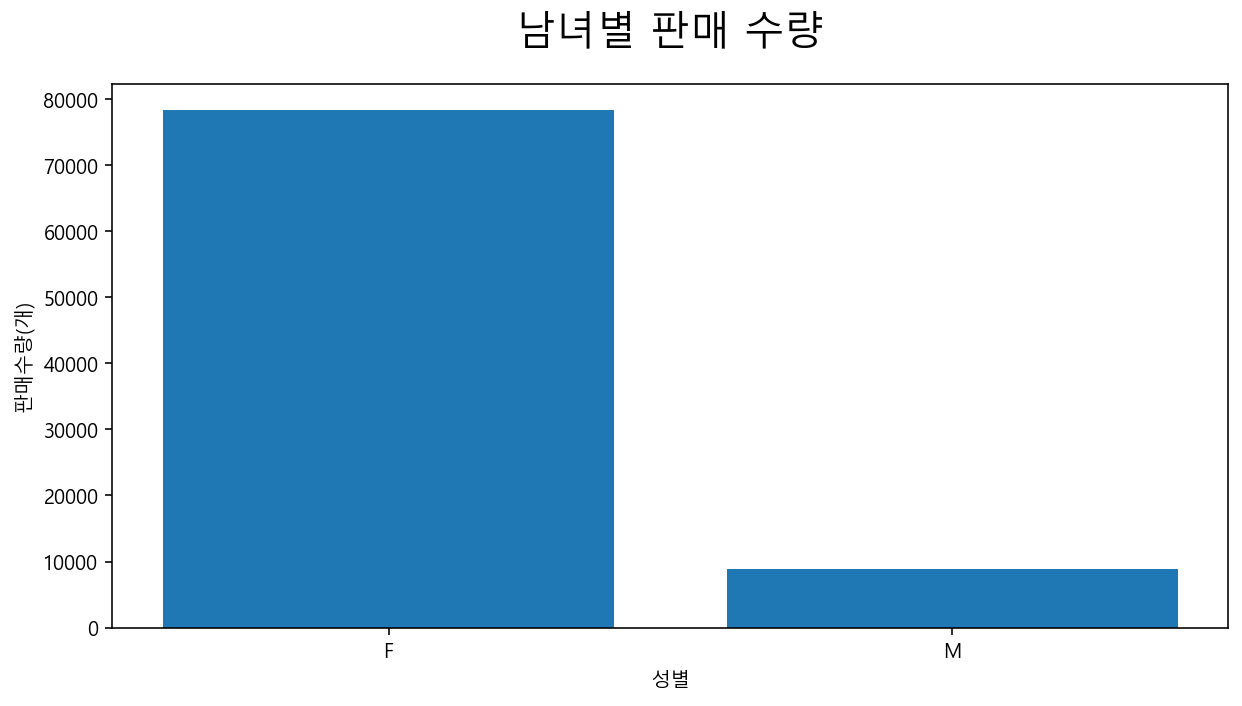

In [40]:
# 남녀별 판매 수량 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Gender'], tmp['Qty'])
plt.title('남녀별 판매 수량', fontsize=20, pad=20)
plt.xlabel('성별')
plt.ylabel('판매수량(개)')
plt.show()

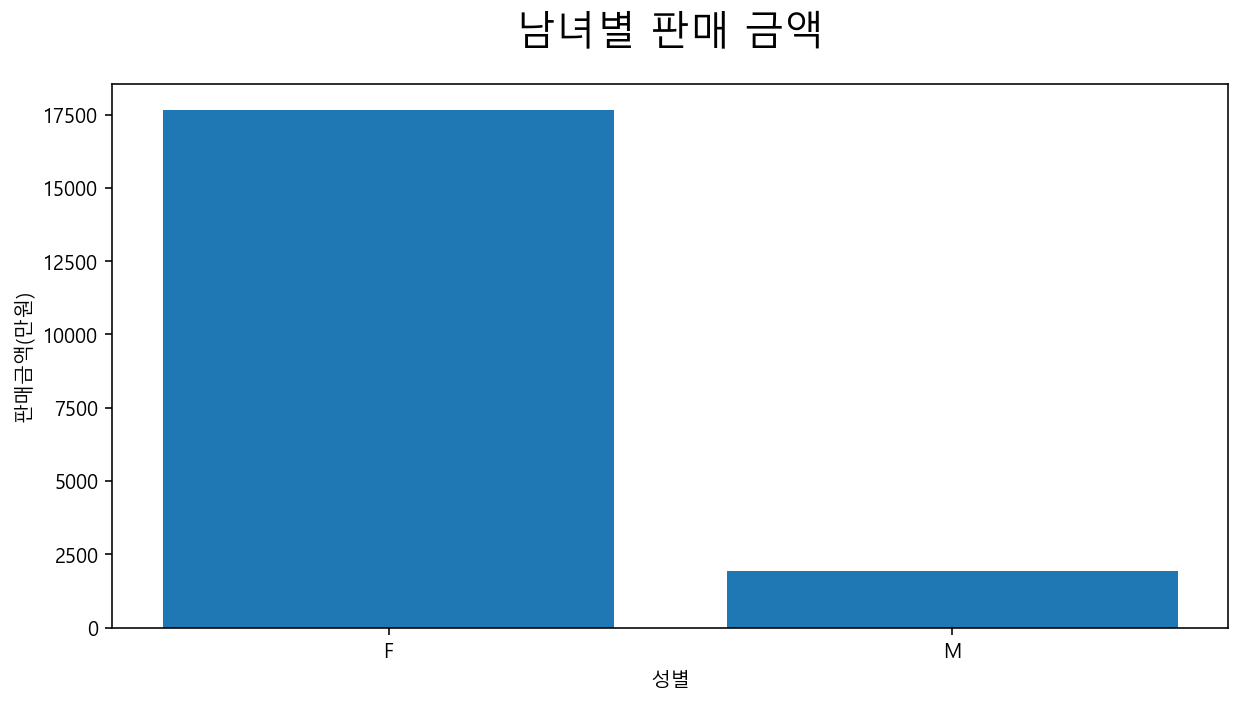

In [41]:
# 남녀별 판매 금액 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Gender'], tmp['Amt'] / 10000)
plt.title('남녀별 판매 금액', fontsize=20, pad=20)
plt.xlabel('성별')
plt.ylabel('판매금액(만원)')
plt.show()

**2) 지역별 판매 현황**

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.

In [42]:
# 지역별 판매 수량과 금액 합
tmp = sales.groupby(by='Addr1', as_index=False)[['Qty', 'Amt']].sum()

# 확인
tmp

,Addr1,Qty,Amt
0,강원도,2688,6397272
1,경기도,50162,112347668
2,경상남도,2,3000
3,경상북도,22,60400
4,광주광역시,30,60914
5,대구광역시,437,1071667
6,서울특별시,21182,47027183
7,인천광역시,12076,27743748
8,전라남도,50,117339
9,전라북도,7,13941


In [43]:
# 지역별 판매 수량 TOP 5
tmp = tmp.sort_values(by='Qty', ascending=False).head(5)
tmp.reset_index(drop=True, inplace=True)

# 확인
tmp

,Addr1,Qty,Amt
0,경기도,50162,112347668
1,서울특별시,21182,47027183
2,인천광역시,12076,27743748
3,강원도,2688,6397272
4,대구광역시,437,1071667


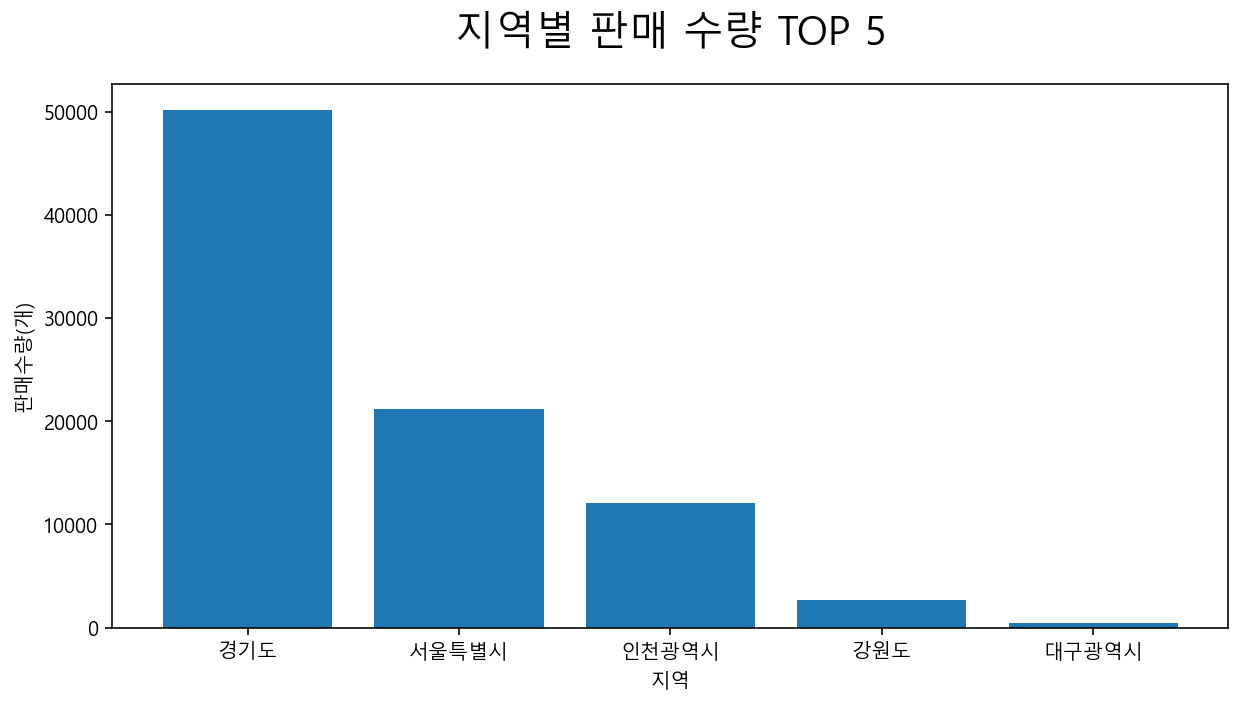

In [44]:
# 지역별 판매 수량 TOP 5 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Addr1'], tmp['Qty'])
plt.title('지역별 판매 수량 TOP 5', fontsize=20, pad=20)
plt.xlabel('지역')
plt.ylabel('판매수량(개)')
plt.show()

In [45]:
# 지역별 판매 금액 합 TOP 5
tmp = tmp.sort_values(by='Amt', ascending=False).head(5)
tmp.reset_index(drop=True, inplace=True)

# 확인
tmp

,Addr1,Qty,Amt
0,경기도,50162,112347668
1,서울특별시,21182,47027183
2,인천광역시,12076,27743748
3,강원도,2688,6397272
4,대구광역시,437,1071667


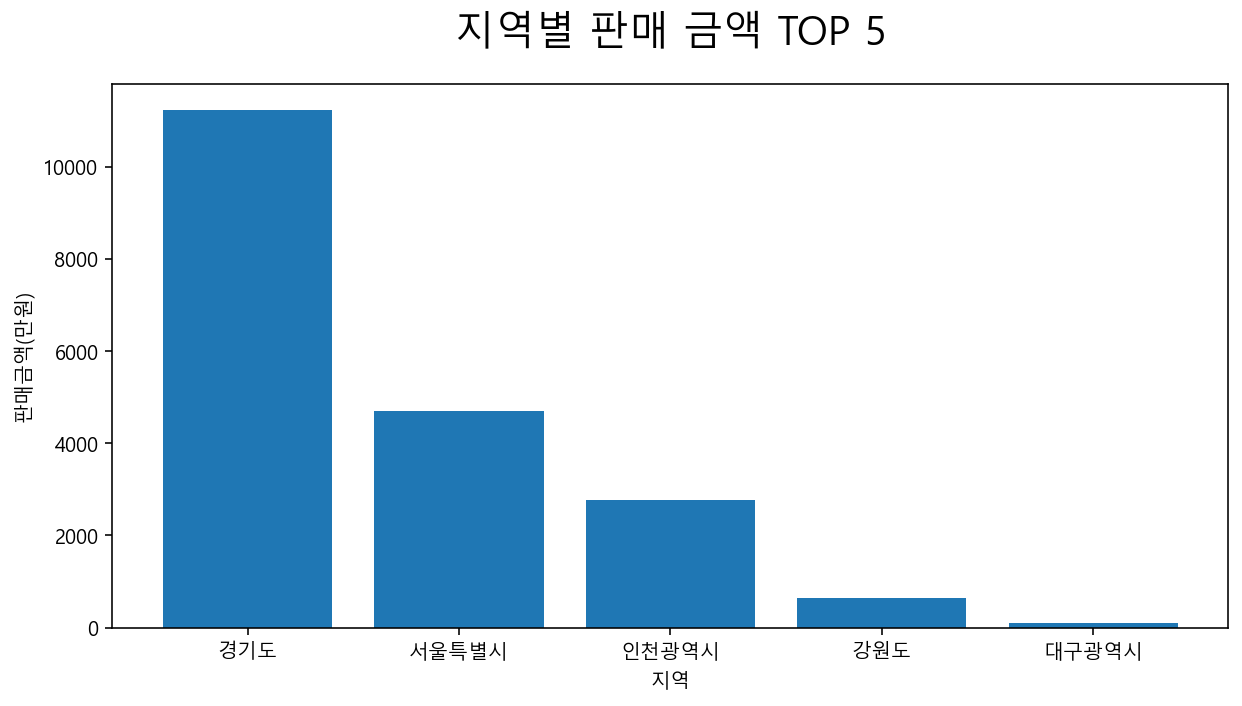

In [46]:
# 지역별 판매 금액 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Addr1'], tmp['Amt'] / 10000)
plt.title('지역별 판매 금액 TOP 5', fontsize=20, pad=20)
plt.xlabel('지역')
plt.ylabel('판매금액(만원)')
plt.show()

**3)상품별 판매 현황**

In [47]:
# 상품별 판매 수량과 금액 합
tmp = sales.groupby(by='ProductName', as_index=False)[['Qty', 'Amt']].sum()

# 확인
tmp.head(10)

,ProductName,Qty,Amt
0,감귤컵푸딩,751,681699
1,감자칩,1975,3707446
2,고구마스틱,788,1622977
3,깻잎,2780,2908859
4,낱개캔디,1798,485476
5,느타리버섯,1436,4202899
6,당근,2198,4484750
7,두부_대,5189,10108897
8,두부_소,3979,7348918
9,딸기_대,907,11064509


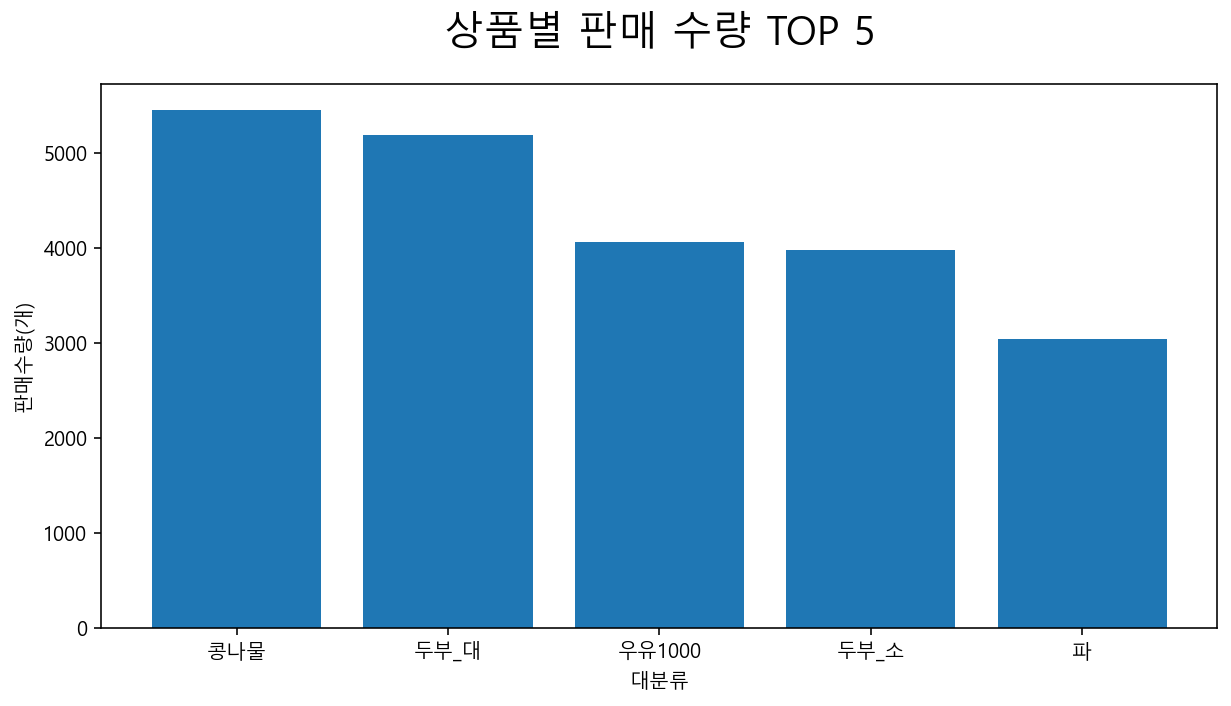

In [48]:
# 상품별 판매 수량 TOP 5
tmp = tmp.sort_values(by='Qty', ascending=False).head(5)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['ProductName'], tmp['Qty'])
plt.title('상품별 판매 수량 TOP 5', fontsize=20, pad=20)
plt.xlabel('대분류')
plt.ylabel('판매수량(개)')
plt.show()

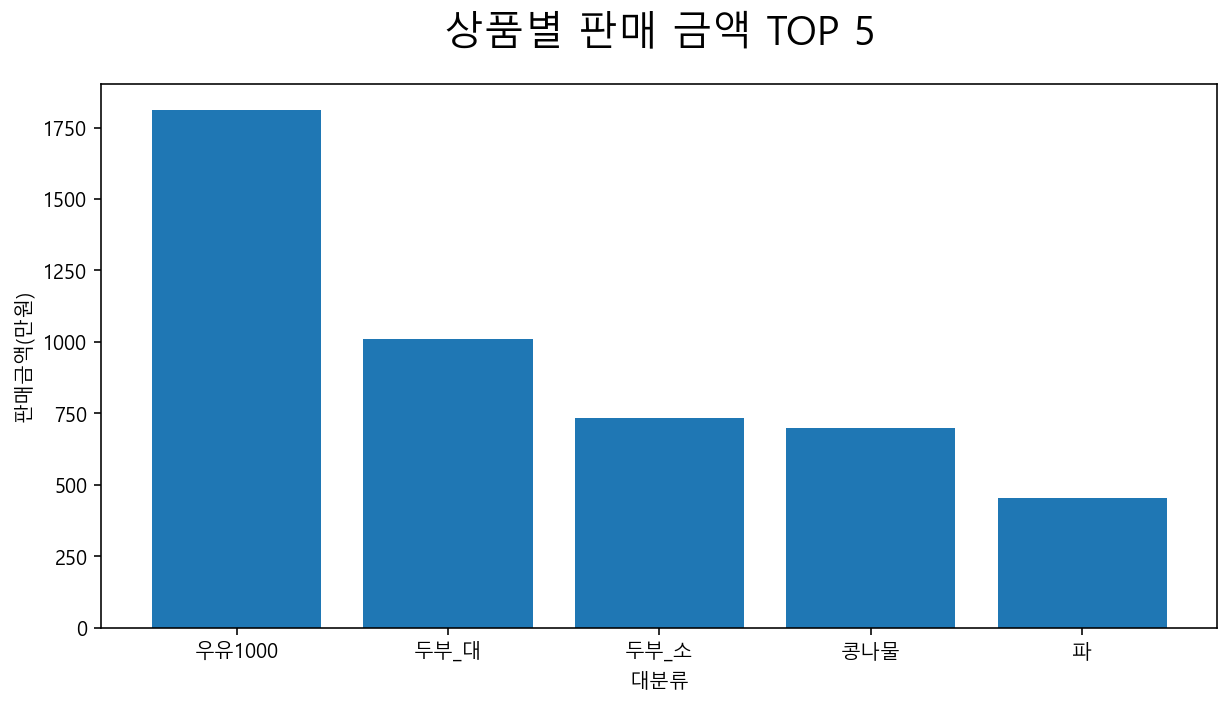

In [49]:
# 상품별 판매 금액 TOP 5
tmp = tmp.sort_values(by='Amt', ascending=False).head(5)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['ProductName'], tmp['Amt'] / 10000)
plt.title('상품별 판매 금액 TOP 5', fontsize=20, pad=20)
plt.xlabel('대분류')
plt.ylabel('판매금액(만원)')
plt.show()

**4)대분류별 판매 현황**

In [50]:
# 대분류별 판매 수량과 금액 합
tmp = sales.groupby(by='Category', as_index=False)[['Qty', 'Amt']].sum()

# 확인
tmp

,Category,Qty,Amt
0,간식,12289,13081325
1,과일,6832,50067195
2,반찬류,20265,32288089
3,유제품,19791,45338311
4,채소,28041,55213705


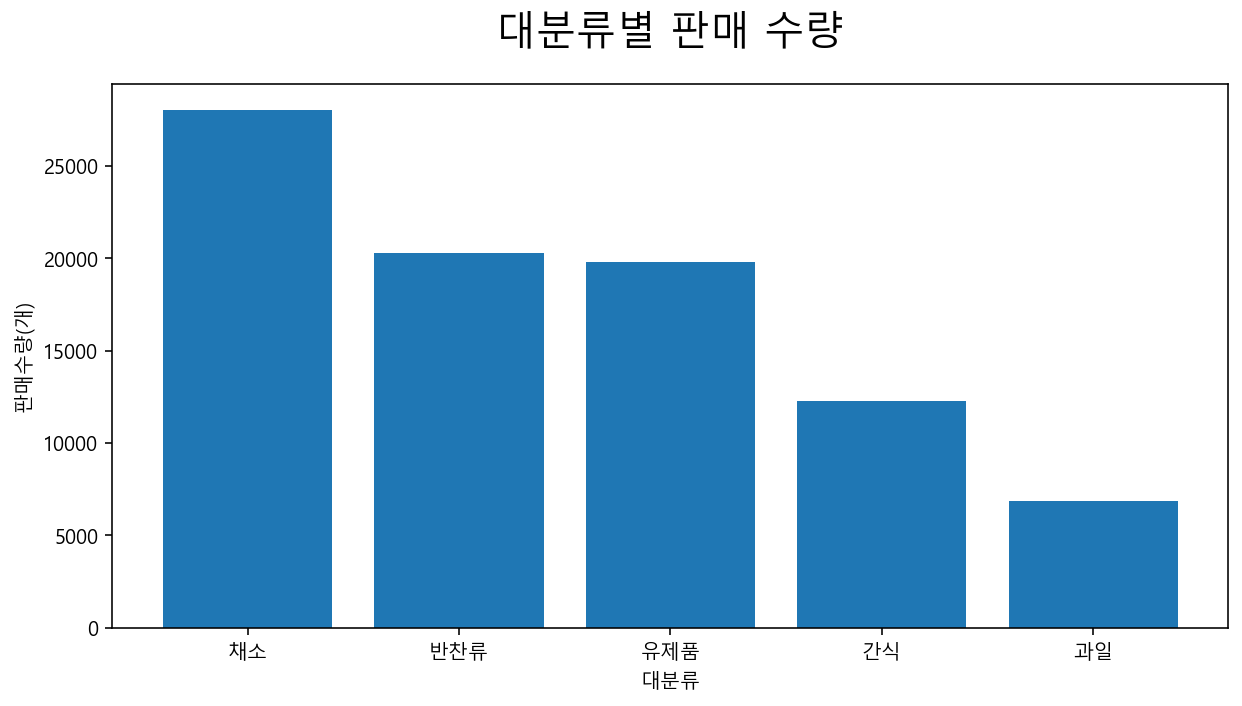

In [51]:
# 대분류별 판매 수량 
tmp = tmp.sort_values(by='Qty', ascending=False)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Category'], tmp['Qty'])
plt.title('대분류별 판매 수량', fontsize=20, pad=20)
plt.xlabel('대분류')
plt.ylabel('판매수량(개)')
plt.show()

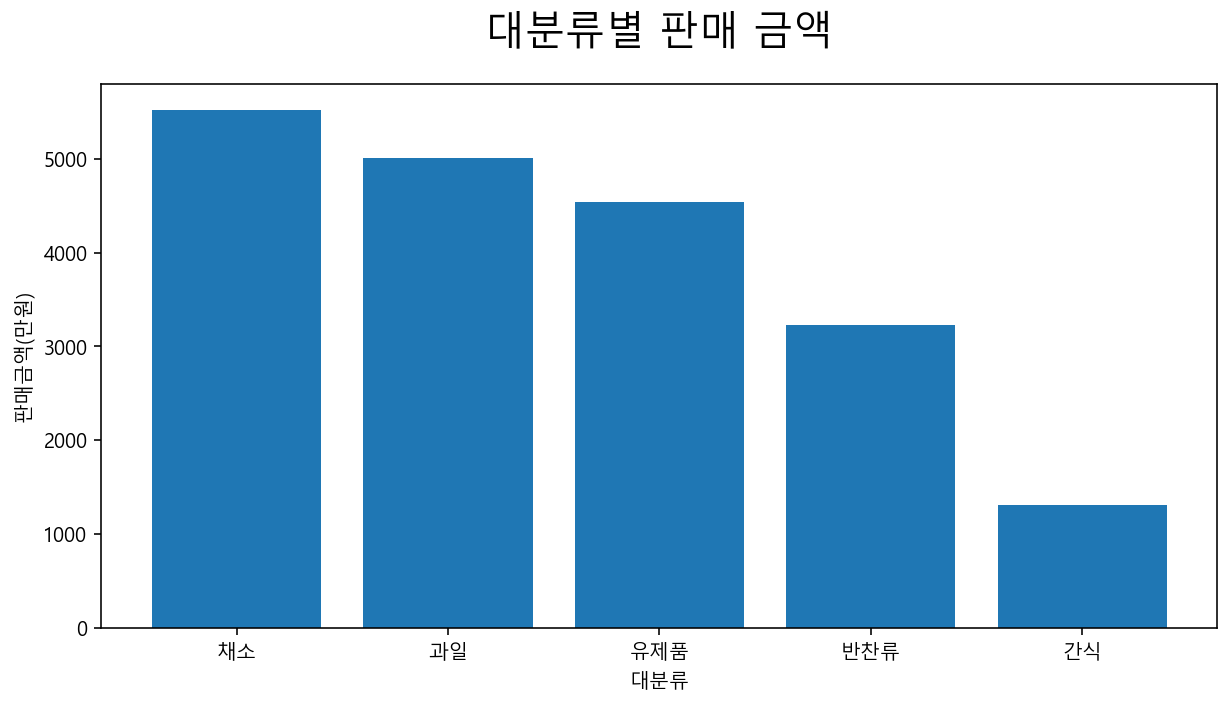

In [52]:
# 대분류별 판매 금액
tmp = tmp.sort_values(by='Amt', ascending=False)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Category'], tmp['Amt'] / 10000)
plt.title('대분류별 판매 금액', fontsize=20, pad=20)
plt.xlabel('대분류')
plt.ylabel('판매금액(만원)')
plt.show()

**5)월별 판매 현황**

In [53]:
# 월별 판매 수량과 금액 합
tmp = sales.groupby(by=['OrderYear', 'OrderMonth'], as_index=False)[['Qty', 'Amt']].sum()
tmp['YearMonth'] = tmp['OrderYear'].astype(str) + '-' + tmp['OrderMonth'].astype(str).str.zfill(2)
tmp = tmp.sort_values(by='YearMonth', ascending=True)
tmp.reset_index(drop=True, inplace=True)

# 확인
tmp

,OrderYear,OrderMonth,Qty,Amt,YearMonth
0,2016,1,5505,14280112,2016-01
1,2016,2,5369,14439692,2016-02
2,2016,3,6275,17135535,2016-03
3,2016,4,6424,15256018,2016-04
4,2016,5,6603,13992944,2016-05
5,2016,6,6445,13215131,2016-06
6,2016,7,5922,10724988,2016-07
7,2016,8,6188,10232592,2016-08
8,2016,9,6243,10592737,2016-09
9,2016,10,5261,10031884,2016-10


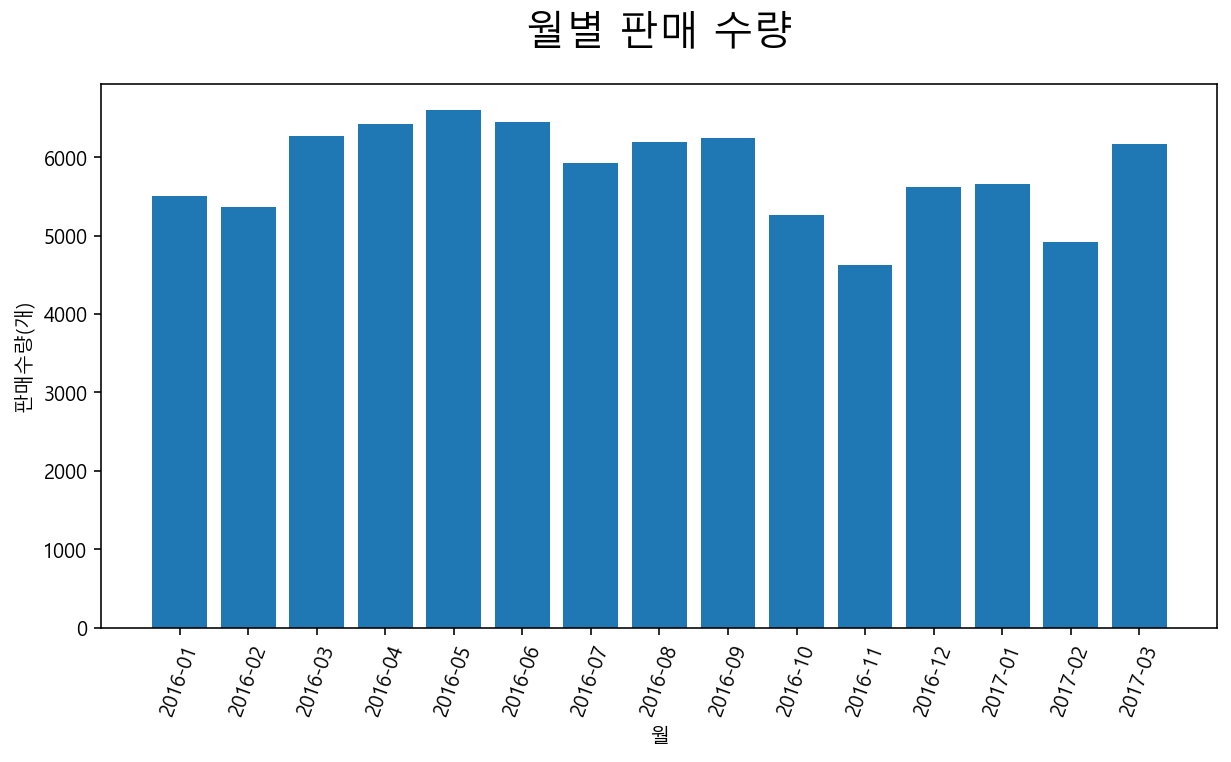

In [54]:
# 월별 판매 수량 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['YearMonth'], tmp['Qty'])
plt.title('월별 판매 수량', fontsize=20, pad=20)
plt.xlabel('월')
plt.ylabel('판매수량(개)')
plt.xticks(rotation=70)
plt.show()

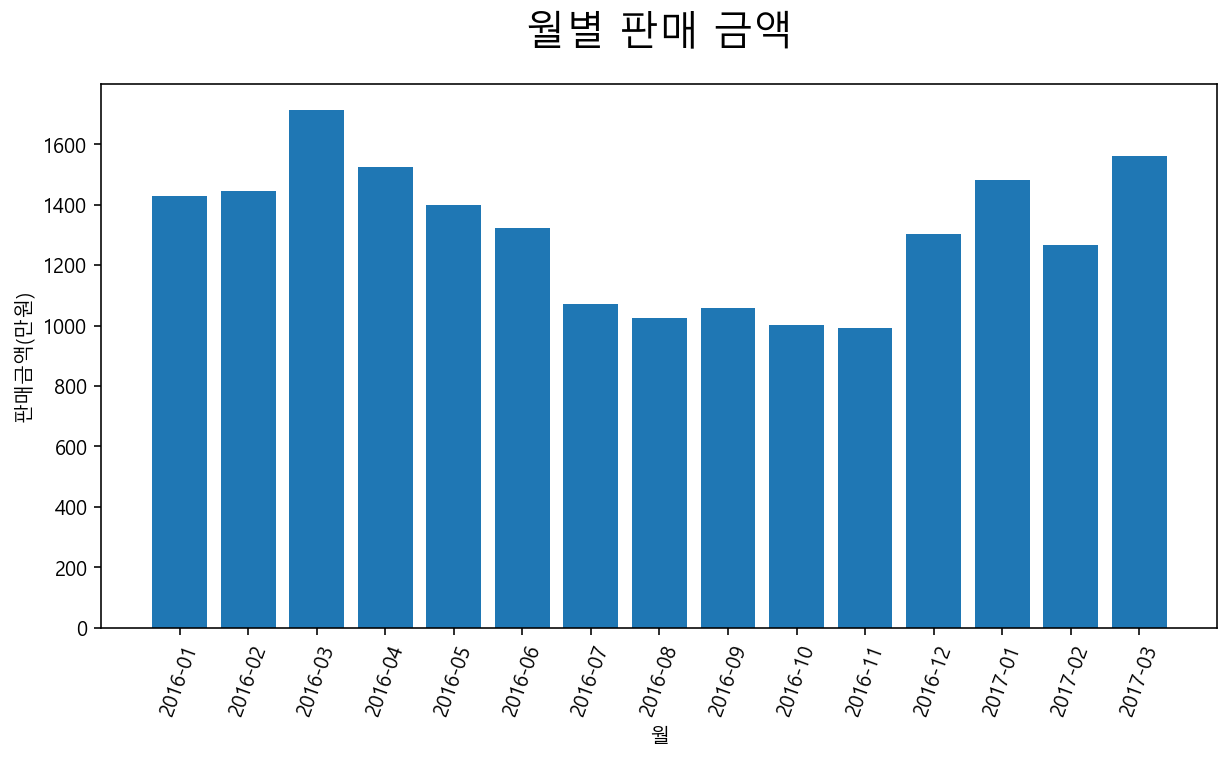

In [55]:
# 월별 판매 금액 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['YearMonth'], tmp['Amt'] / 10000)
plt.title('월별 판매 금액', fontsize=20, pad=20)
plt.xlabel('월')
plt.ylabel('판매금액(만원)')
plt.xticks(rotation=70)
plt.show()

**6)연령대별 판매 현황**

In [56]:
# 연령대별 판매 수량과 금액 합
tmp = sales.groupby(by='AgeGrp', as_index=False)[['Qty', 'Amt']].sum()
tmp = tmp.sort_values(by='AgeGrp', ascending=True)
tmp.reset_index(drop=True, inplace=True)

# 확인
tmp

,AgeGrp,Qty,Amt
0,10,2,4364
1,20,613,1334569
2,30,19143,41339112
3,40,45839,105096033
4,50,15110,33500611
5,60,4535,10454549
6,70,1888,4201980
7,80,88,57407


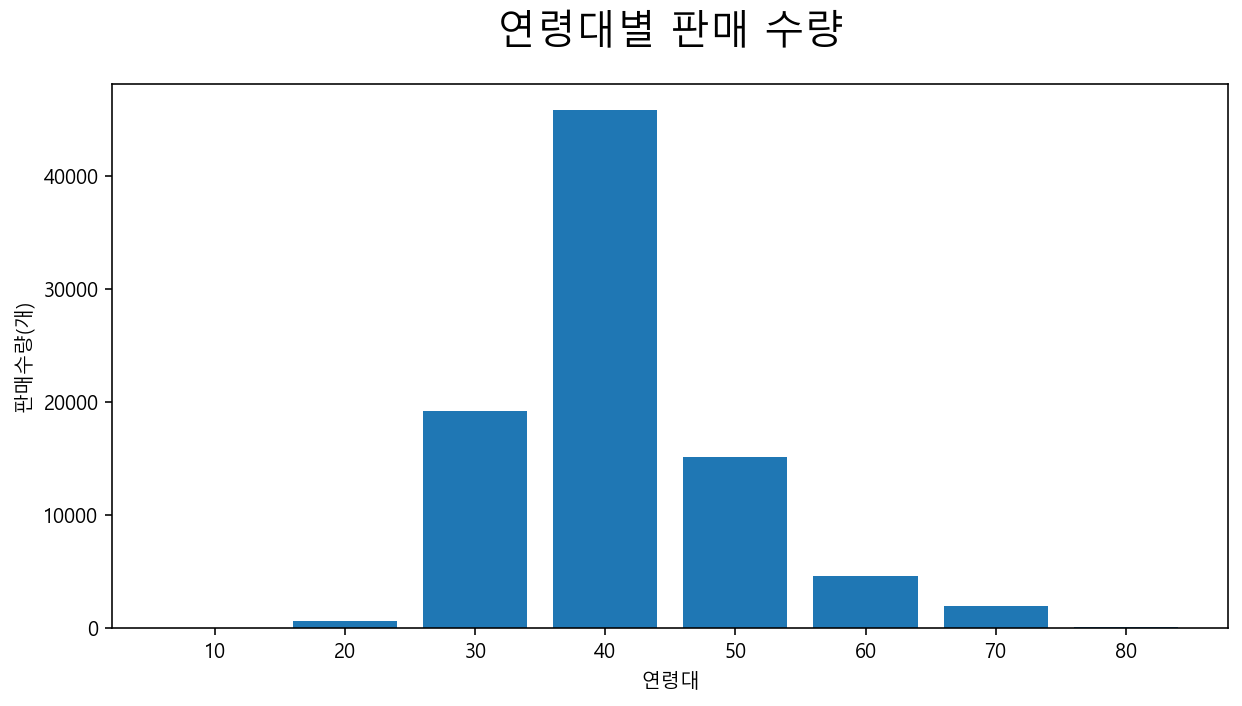

In [57]:
# 연령대별 판매 수량 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['AgeGrp'].astype(str), tmp['Qty'])
plt.title('연령대별 판매 수량', fontsize=20, pad=20)
plt.xlabel('연령대')
plt.ylabel('판매수량(개)')
plt.show()

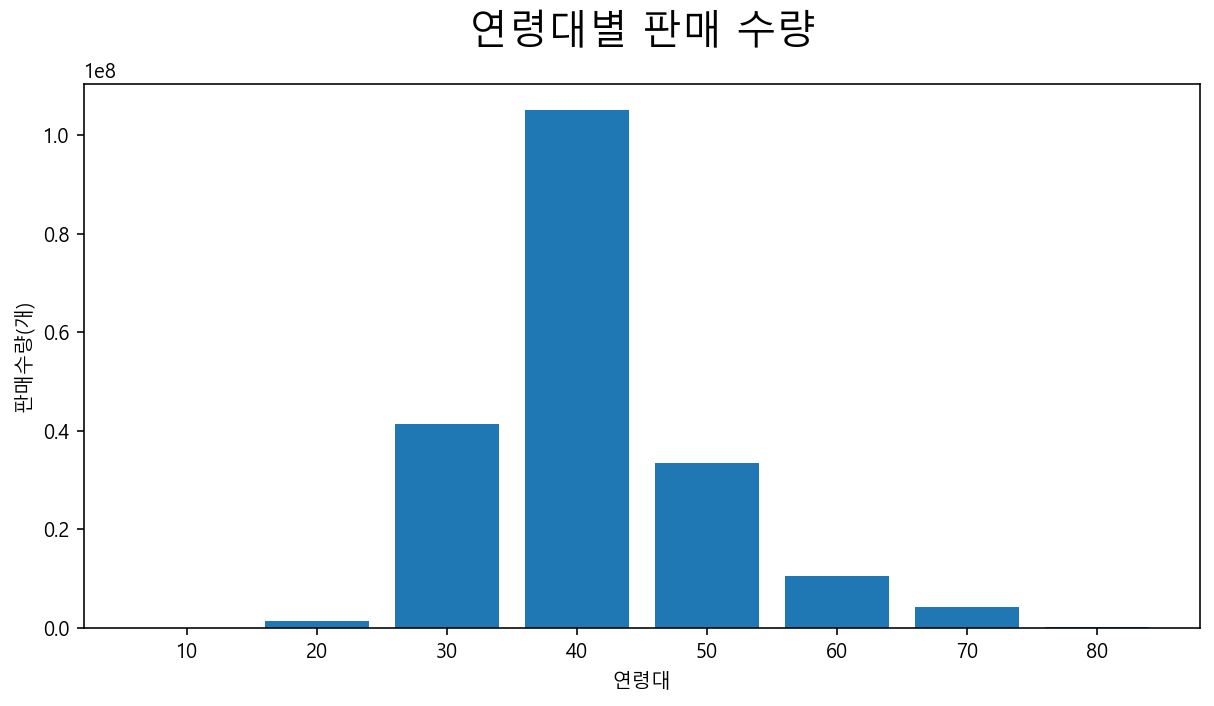

In [58]:
# 연령대별 판매 금액 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['AgeGrp'].astype(str), tmp['Amt'])
plt.title('연령대별 판매 수량', fontsize=20, pad=20)
plt.xlabel('연령대')
plt.ylabel('판매수량(개)')
plt.show()

## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.

In [59]:
# 고객별 집계
cst = orders.groupby(by='CustomerID', as_index=False)[['Qty', 'Amt']].sum()

# 확인
cst.head()

,CustomerID,Qty,Amt
0,c017487,127,296447
1,c017503,42,160444
2,c017517,192,317590
3,c017522,64,219849
4,c017526,26,48881


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [60]:
cst['Qty'].value_counts() 

1      230
2      180
3      123
4      115
5       90
      ... 
302      1
300      1
294      1
290      1
613      1
Name: Qty, Length: 233, dtype: int64

In [61]:
# 기초통계정보
cst.describe()

,Qty,Amt
count,2237.000000,2.237000e+03
mean,38.988824,8.761226e+04
std,63.216430,1.401784e+05
min,1.000000,2.730000e+02
25%,4.000000,8.450000e+03
50%,13.000000,3.015000e+04
75%,47.000000,1.026730e+05
max,1008.000000,1.245250e+06


**3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [62]:
# 등급 구하기
bin = [-np.inf, 30000, 100000, 300000, 600000, np.inf]
label = ['Family', 'Bronze', 'Silver', 'Gold', 'Platinum']
cst['Level'] = pd.cut(cst['Amt'], bins=bin, labels=label)

# 확인
cst.head()

,CustomerID,Qty,Amt,Level
0,c017487,127,296447,Silver
1,c017503,42,160444,Silver
2,c017517,192,317590,Gold
3,c017522,64,219849,Silver
4,c017526,26,48881,Bronze


- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [63]:
# 등급별 고객 수
cst['Level'].value_counts()

Family      1113
Bronze       556
Silver       392
Gold         143
Platinum      33
Name: Level, dtype: int64

## 6.등급별 고객 분석

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

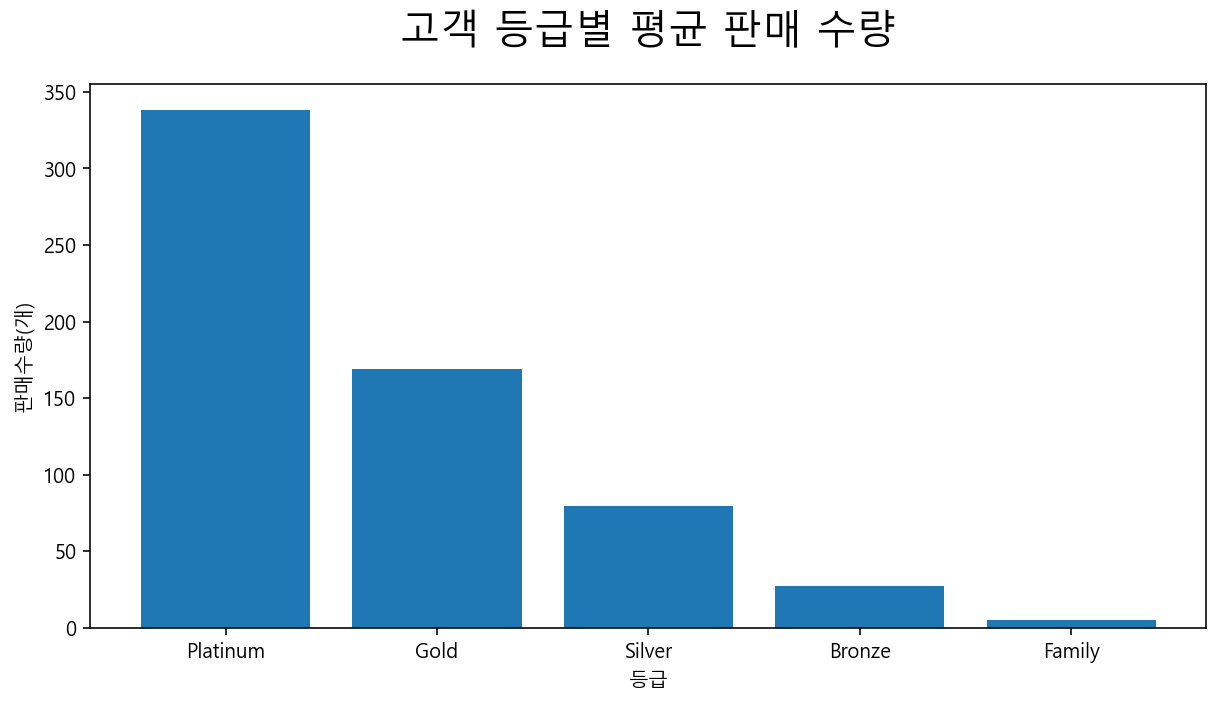

In [64]:
# 등급별 평균 판매 수량
tmp = cst.groupby(by='Level', as_index=False)[['Qty']].mean()
tmp.sort_values(by='Level', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Level'], tmp['Qty'])
plt.title('고객 등급별 평균 판매 수량', fontsize=20, pad=20)
plt.xlabel('등급')
plt.ylabel('판매수량(개)')
plt.show()

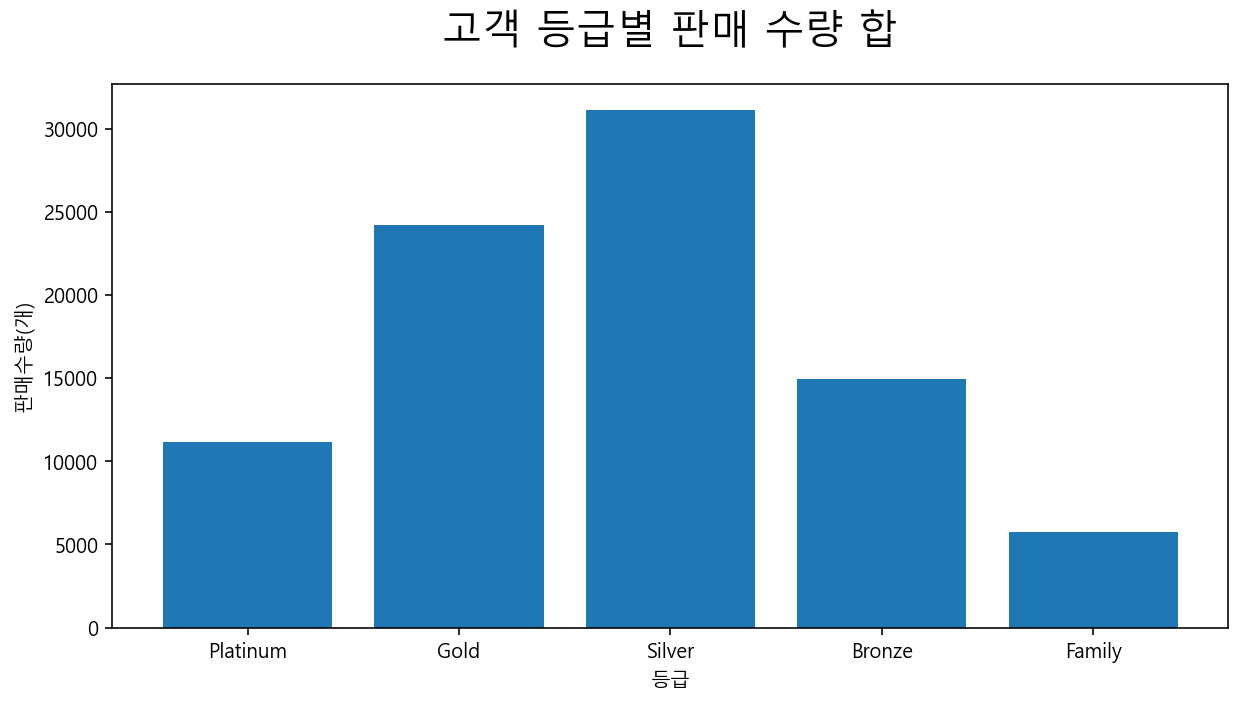

In [65]:
# 등급별 판매 수량 합
tmp = cst.groupby(by='Level', as_index=False)[['Qty']].sum()
tmp.sort_values(by='Level', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Level'], tmp['Qty'])
plt.title('고객 등급별 판매 수량 합', fontsize=20, pad=20)
plt.xlabel('등급')
plt.ylabel('판매수량(개)')
plt.show()

**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

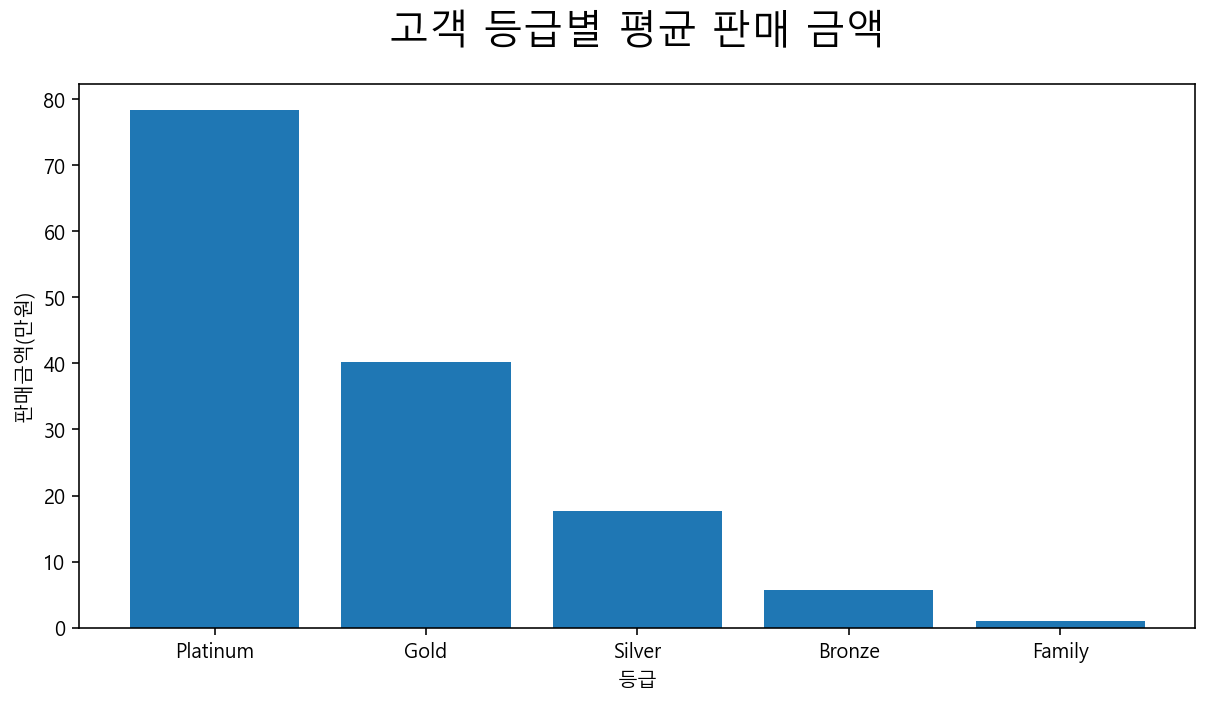

In [66]:
# 등급별 평균 판매 금액
tmp = cst.groupby(by='Level', as_index=False)[['Amt']].mean()
tmp.sort_values(by='Level', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Level'], tmp['Amt'] / 10000)
plt.title('고객 등급별 평균 판매 금액', fontsize=20, pad=20)
plt.xlabel('등급')
plt.ylabel('판매금액(만원)')
plt.show()

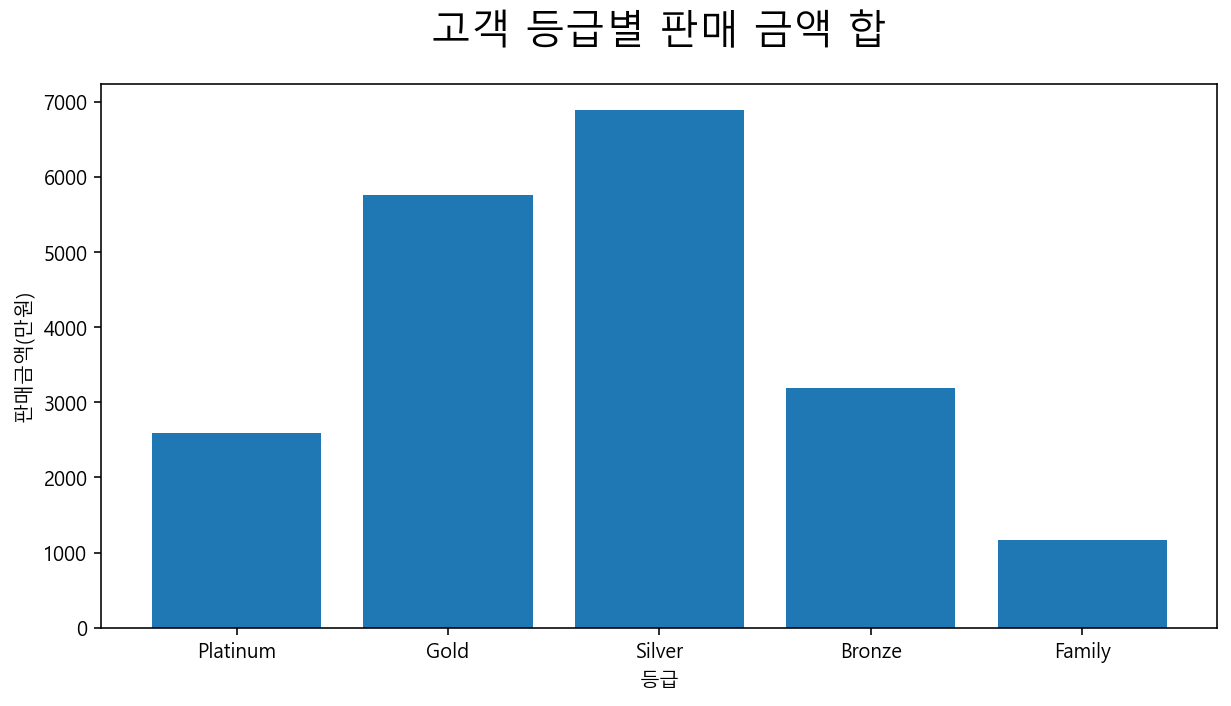

In [67]:
# 등급별 평균 판매 금액
tmp = cst.groupby(by='Level', as_index=False)[['Amt']].sum()
tmp.sort_values(by='Level', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Level'], tmp['Amt'] / 10000)
plt.title('고객 등급별 판매 금액 합', fontsize=20, pad=20)
plt.xlabel('등급')
plt.ylabel('판매금액(만원)')
plt.show()

**3)등급별 판매 횟수**

In [68]:
 # 고객별 구매 횟수 병합
cst_count = sales.groupby(by='CustomerID', as_index=False)[['Qty']].count()
cst_count.columns = ['CustomerID', 'Count']
cst = pd.merge(cst, cst_count, on='CustomerID', how='inner') 

# 확인
cst.head()

,CustomerID,Qty,Amt,Level,Count
0,c017487,127,296447,Silver,90
1,c017503,42,160444,Silver,37
2,c017517,192,317590,Gold,124
3,c017522,64,219849,Silver,61
4,c017526,26,48881,Bronze,21


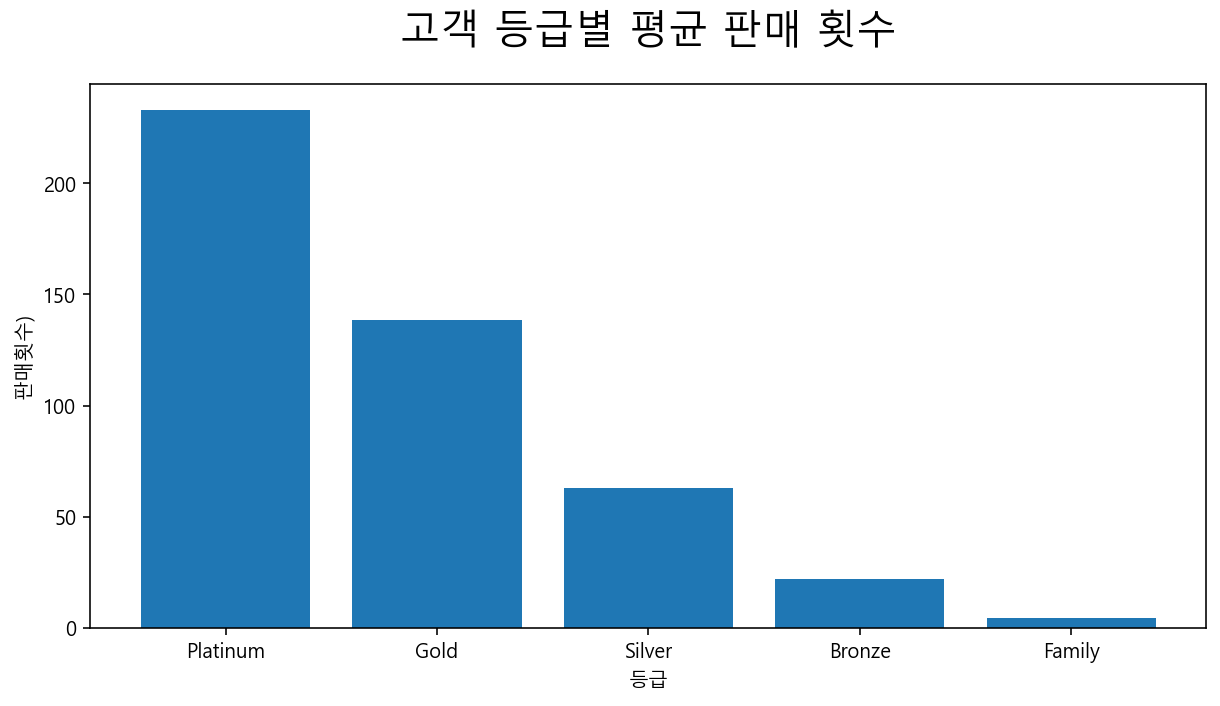

In [69]:
# 고객 등급별 평균 판매 횟수
tmp = cst.groupby(by='Level', as_index=False)[['Count']].mean()
tmp.sort_values(by='Level', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Level'], tmp['Count'])
plt.title('고객 등급별 평균 판매 횟수', fontsize=20, pad=20)
plt.xlabel('등급')
plt.ylabel('판매횟수)')
plt.show()

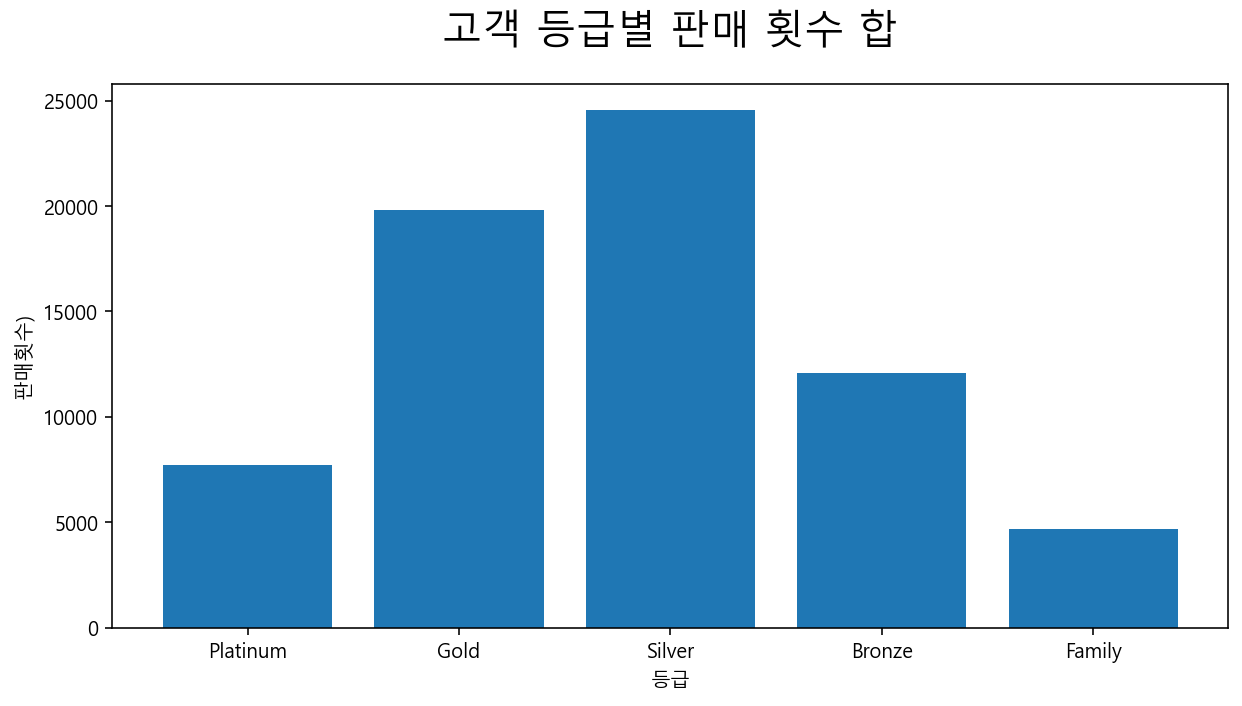

In [70]:
# 고객 등급별 판매 횟수 합
tmp = cst.groupby(by='Level', as_index=False)[['Count']].sum()
tmp.sort_values(by='Level', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Level'], tmp['Count'])
plt.title('고객 등급별 판매 횟수 합', fontsize=20, pad=20)
plt.xlabel('등급')
plt.ylabel('판매횟수)')
plt.show()

**4)2016, 2017 분리**

In [71]:
# 고2916, 2017 판매 수량, 판매 금액 총합
cst_2016 = sales[sales['OrderYear'] == 2016].groupby(by='CustomerID', as_index=False)[['Qty', 'Amt']].sum()
cst_2016.columns=['CustomerID', 'Qty2016', 'Amt2016']
cst = pd.merge(cst, cst_2016, on='CustomerID', how='inner') 

cst_2017 = sales[sales['OrderYear'] == 2017].groupby(by='CustomerID', as_index=False)[['Qty', 'Amt']].sum()
cst_2017.columns=['CustomerID', 'Qty2017', 'Amt2017']
cst = pd.merge(cst, cst_2017, on='CustomerID', how='inner') 

# 확인
cst.head()

,CustomerID,Qty,Amt,Level,Count,Qty2016,Amt2016,Qty2017,Amt2017
0,c017487,127,296447,Silver,90,103,246041,24,50406
1,c017503,42,160444,Silver,37,36,128694,6,31750
2,c017517,192,317590,Gold,124,155,240392,37,77198
3,c017522,64,219849,Silver,61,49,181799,15,38050
4,c017526,26,48881,Bronze,21,23,37481,3,11400


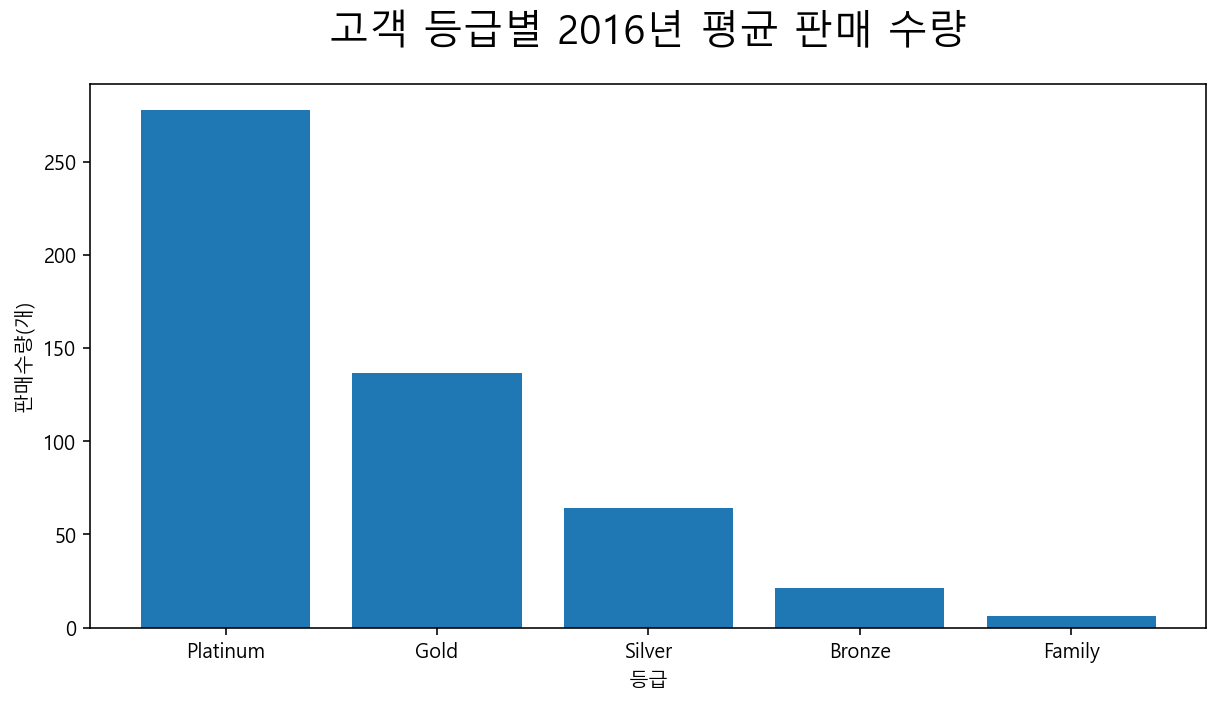

In [72]:
# 2016년 등급별 평균 판매 수량
tmp = cst.groupby(by='Level', as_index=False)[['Qty2016']].mean()
tmp.sort_values(by='Level', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Level'], tmp['Qty2016'])
plt.title('고객 등급별 2016년 평균 판매 수량', fontsize=20, pad=20)
plt.xlabel('등급')
plt.ylabel('판매수량(개)')
plt.show()

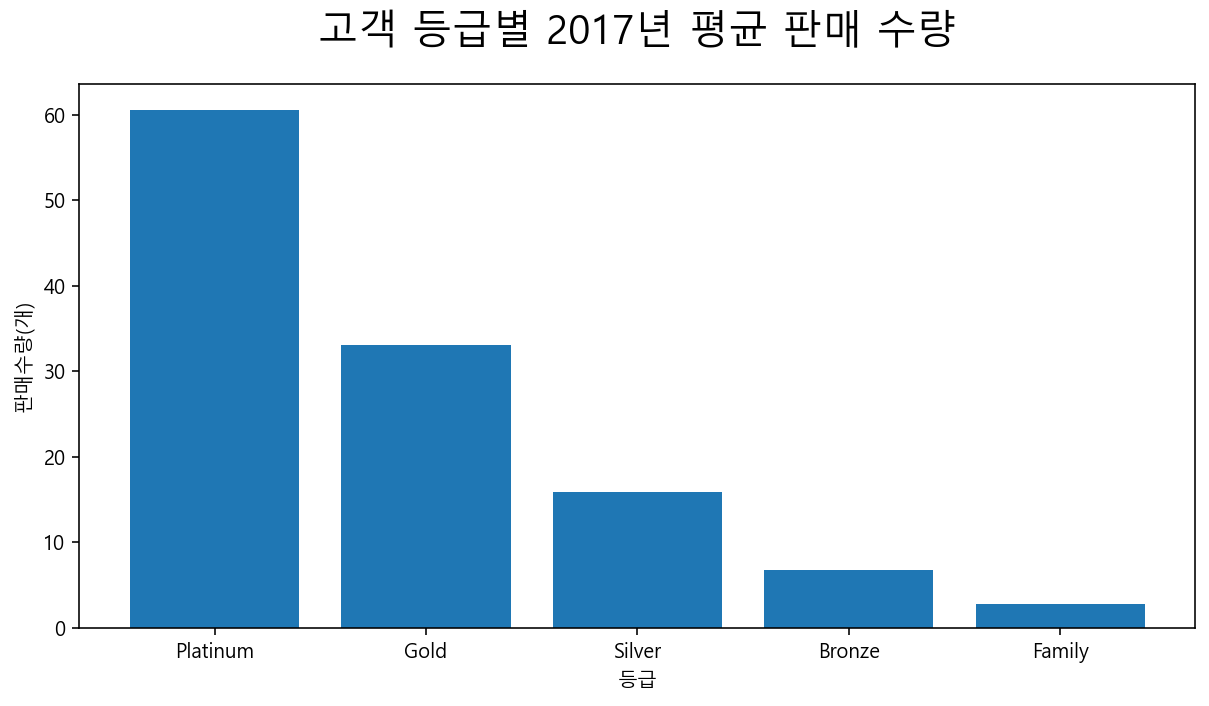

In [73]:
# 2017년 등급별 평균 판매 수량
tmp = cst.groupby(by='Level', as_index=False)[['Qty2017']].mean()
tmp.sort_values(by='Level', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['Level'], tmp['Qty2017'])
plt.title('고객 등급별 2017년 평균 판매 수량', fontsize=20, pad=20)
plt.xlabel('등급')
plt.ylabel('판매수량(개)')
plt.show()

**5)Platinum 고객 판매 현황 분석**

In [74]:
# sales에 등급 추가
sales2 = pd.merge(sales, cst[['CustomerID', 'Level']], on='CustomerID', how='inner')

# 확인
sales2.head()

,Qty,Amt,CustomerID,Gender,BirthYear,Addr1,ProductName,Category,OrderYear,OrderMonth,RegisterYear,RegisterMonth,Age,AgeGrp,Level
0,2,7900,c107853,M,1961,경기도,토마토,과일,2016,1,2008,7,56,50,Silver
1,3,3000,c107853,M,1961,경기도,짱구,간식,2016,1,2008,7,56,50,Silver
2,4,3636,c107853,M,1961,경기도,짱구,간식,2016,1,2008,7,56,50,Silver
3,2,2000,c107853,M,1961,경기도,짱구,간식,2016,2,2008,7,56,50,Silver
4,4,4000,c107853,M,1961,경기도,짱구,간식,2016,2,2008,7,56,50,Silver


In [75]:
# Platinum 고객 상품별 판매 수량 TOP 5
platinum = sales2.loc[sales2['Level'] == 'Platinum', :]
tmp = platinum.groupby(by='ProductName', as_index=False)[['Qty', 'Amt']].sum()
tmp = tmp.sort_values(by='Amt', ascending=False).head(5)
tmp = tmp.reset_index(drop=True)

# 확인
tmp

,ProductName,Qty,Amt
0,우유1000,921,4108532
1,딸기_대,150,1767551
2,사과_소,169,1433828
3,유기농우유,372,1018680
4,플레인요거트,258,953375


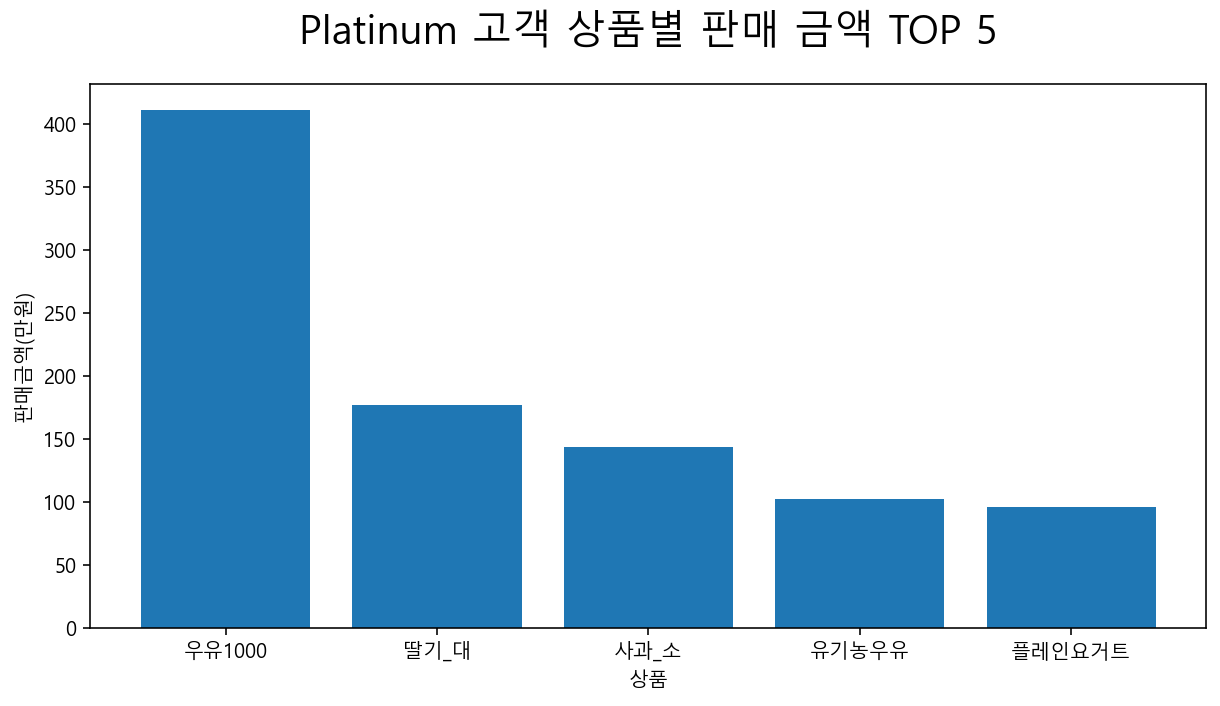

In [76]:
# Platinum 고객 상품별 판매 금액 TOP 5 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['ProductName'], tmp['Amt'] / 10000)
plt.title('Platinum 고객 상품별 판매 금액 TOP 5', fontsize=20, pad=20)
plt.xlabel('상품')
plt.ylabel('판매금액(만원)')
plt.show()

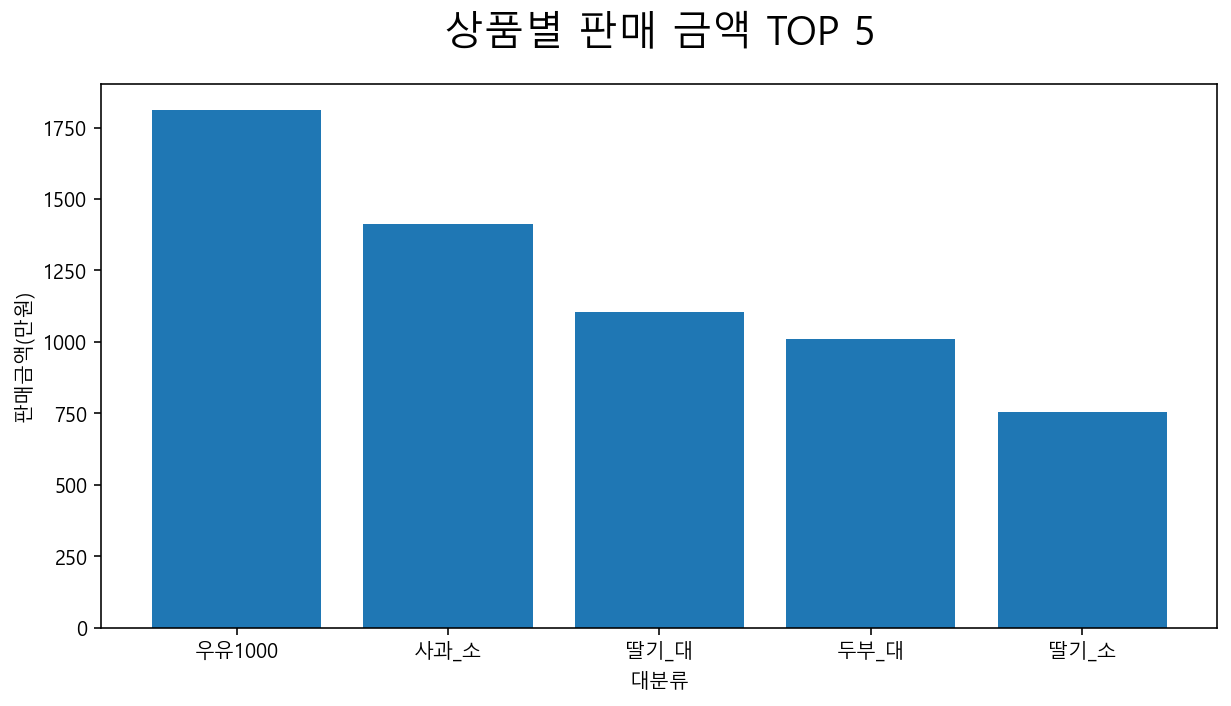

In [77]:
# 상품별 판매 금액 TOP 5(위 차트와 비교)
tmp = sales.groupby(by='ProductName', as_index=False)[['Qty', 'Amt']].sum()
tmp = tmp.sort_values(by='Amt', ascending=False).head(5)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['ProductName'], tmp['Amt'] / 10000)
plt.title('상품별 판매 금액 TOP 5', fontsize=20, pad=20)
plt.xlabel('대분류')
plt.ylabel('판매금액(만원)')
plt.show()

## 7.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**






- 경기도에서 차지하는 비율이 가장 높았다. 
- 높은 등급의 고객이 구매해가는 평균 판매 금액이나 평균 판매 수량은 가장 많았다.
- 하지만 등급별 고객 구매 횟수나 금액의 총 합은 siivler 등급에서 가장 많은 것을 확인할 수 있었다.
- 세부 상품별 판매 금액은 우유1000나 과일 두부가 많은 것으로 확인.
- 전체 판매 수량에서는 채소나 반찬, 유제품이 많은 것을 확인.
- 해당 사항으로 보아 이용하는 고객들이 주부가 가장 많을 것으로 추측. 
- 프로모션을 진행한다면, addr2를 기준으로 판매되는 품목의 비율을 다시 한 번 확인할 필요성 有